# Car Price Prediction

### 1. Understanding the Data

In [621]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [622]:
cars_raw = pd.read_csv('C:\\Users\\amjana\\Documents\\MS\\ML\\Linear Regression - Assignment\\CarPrice_Assignment.csv')
cars_raw.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [623]:
cars_raw.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000,205.0000
mean,103.0000,0.8341,98.7566,174.0493,65.9078,53.7249,2555.5659,126.9073,3.3298,3.2554,10.1425,104.1171,5125.1220,25.2195,30.7512,13276.7106
std,59.3226,1.2453,6.0218,12.3373,2.1452,2.4435,520.6802,41.6427,0.2708,0.3136,3.9720,39.5442,476.9856,6.5421,6.8864,7988.8523
min,1.0000,-2.0000,86.6000,141.1000,60.3000,47.8000,1488.0000,61.0000,2.5400,2.0700,7.0000,48.0000,4150.0000,13.0000,16.0000,5118.0000
25%,52.0000,0.0000,94.5000,166.3000,64.1000,52.0000,2145.0000,97.0000,3.1500,3.1100,8.6000,70.0000,4800.0000,19.0000,25.0000,7788.0000
50%,103.0000,1.0000,97.0000,173.2000,65.5000,54.1000,2414.0000,120.0000,3.3100,3.2900,9.0000,95.0000,5200.0000,24.0000,30.0000,10295.0000
75%,154.0000,2.0000,102.4000,183.1000,66.9000,55.5000,2935.0000,141.0000,3.5800,3.4100,9.4000,116.0000,5500.0000,30.0000,34.0000,16503.0000
max,205.0000,3.0000,120.9000,208.1000,72.3000,59.8000,4066.0000,326.0000,3.9400,4.1700,23.0000,288.0000,6600.0000,49.0000,54.0000,45400.0000


In [624]:
cars_raw.head

<bound method NDFrame.head of      car_ID  symboling                       CarName fueltype aspiration  \
0    1       3          alfa-romero giulia            gas      std         
1    2       3          alfa-romero stelvio           gas      std         
2    3       1          alfa-romero Quadrifoglio      gas      std         
3    4       2          audi 100 ls                   gas      std         
4    5       2          audi 100ls                    gas      std         
5    6       2          audi fox                      gas      std         
6    7       1          audi 100ls                    gas      std         
7    8       1          audi 5000                     gas      std         
8    9       1          audi 4000                     gas      turbo       
9    10      0          audi 5000s (diesel)           gas      turbo       
10   11      2          bmw 320i                      gas      std         
11   12      0          bmw 320i                      gas 

In [625]:
cars_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [626]:
# there is no NA
cars_raw.isna().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

### 2. Data Cleaning

In [627]:
#Splitting company name from CarName column
Company = cars_raw['CarName'].apply(lambda x : x.split(' ')[0])
cars_raw.insert(3,"CompanyName",Company)
cars_raw.drop(['CarName'],axis=1,inplace=True)
cars_raw.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495.0000
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500.0000
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500.0000
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950.0000
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450.0000


In [628]:
# dropping car_ID as its not needed

cars_raw = cars_raw.drop('car_ID',axis=1)

In [629]:
# Unique Car company

cars_raw['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [630]:
# Updating incorrect names with correct name

cars_raw.CompanyName = cars_raw.CompanyName.str.lower()

def update_company(a,b):
    cars_raw.CompanyName.replace(a,b,inplace=True)

update_company('maxda','mazda')
update_company('porcshce','porsche')
update_company('toyouta','toyota')
update_company('vokswagen','volkswagen')
update_company('vw','volkswagen')

cars_raw.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [631]:
# changing the datatype of symboling as it is categorical variable as per dictionary file

cars_raw['symboling'] = cars_raw['symboling'].astype(str)

In [632]:
# checking for duplicates

cars_raw.loc[cars_raw.duplicated()]

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [633]:
# Segregation of Numerical and Categorical Variables/Columns

cat_col = cars_raw.select_dtypes(include=['object']).columns
num_col = cars_raw.select_dtypes(exclude=['object']).columns
df_cat = cars_raw[cat_col]
df_num = cars_raw[num_col]

### 3. Data Visualization

Text(0, 0.5, 'CarsCount')

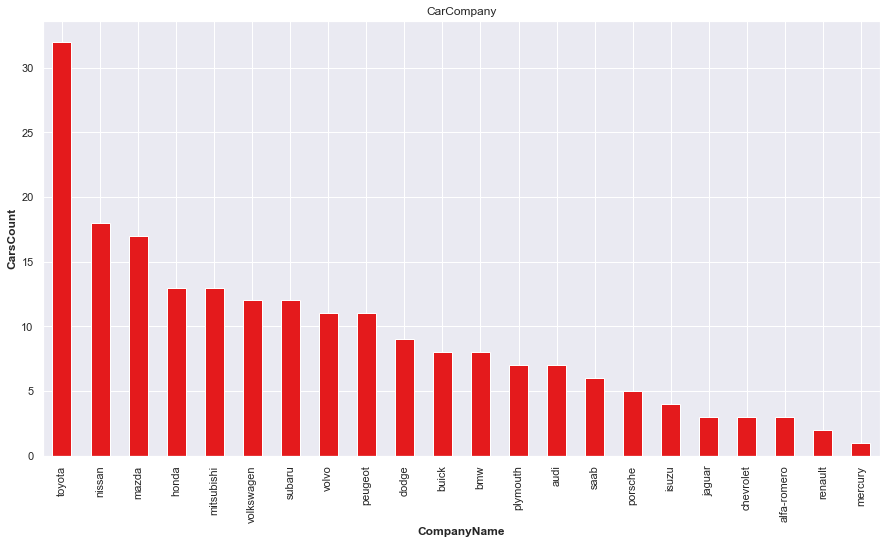

In [634]:
# Visualizing the different car names available

plt.rcParams['figure.figsize'] = [15,8]
ax=cars_raw['CompanyName'].value_counts().plot(kind='bar',stacked=True, colormap = 'Set1')
ax.title.set_text('CarCompany')
plt.xlabel("CompanyName",fontweight = 'bold')
plt.ylabel("CarsCount",fontweight = 'bold')

#### Insights:
- Toyota seems to be the most favoured cars.
- Mercury seems to be the least favoured cars.

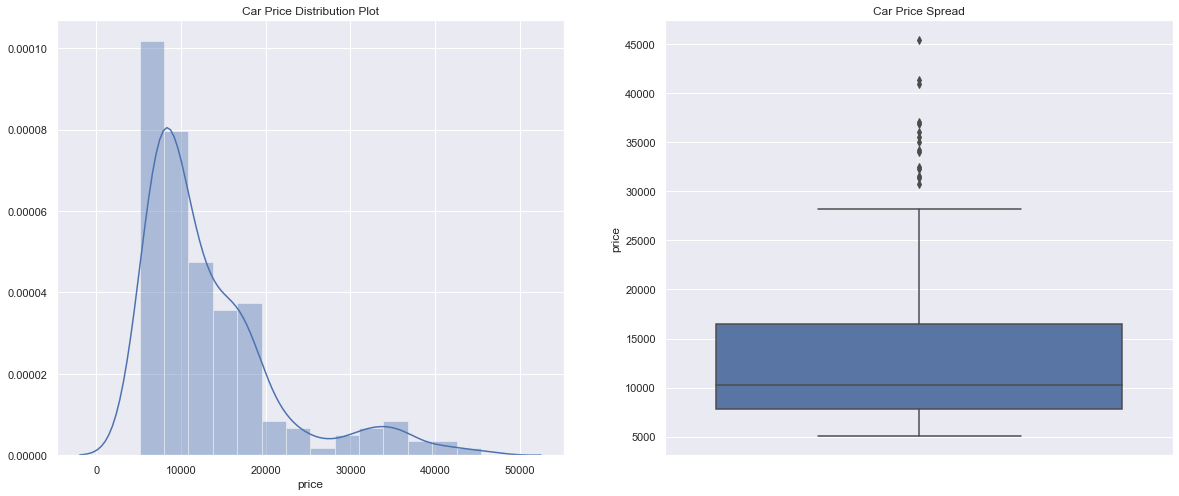

In [635]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars_raw.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars_raw.price)

plt.show()

In [636]:
print(cars_raw.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count   205.0000  
mean    13276.7106
std     7988.8523 
min     5118.0000 
25%     7788.0000 
50%     10295.0000
75%     16503.0000
85%     18500.0000
90%     22563.0000
100%    45400.0000
max     45400.0000
Name: price, dtype: float64


#### Inference :

- The plot seemed to be right-skewed, meaning that the most prices in the dataset are below 15,000.
- The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)

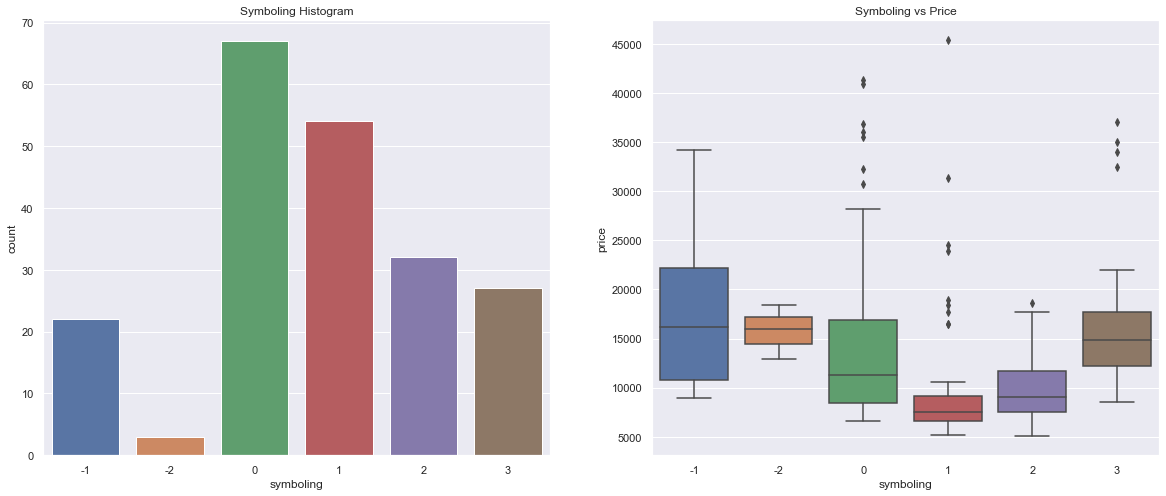

In [637]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars_raw.symboling)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars_raw.symboling, y=cars_raw.price)

plt.show()

#### Inference :

- symboling with `0` and `1` values have high number of cars.
- The cars with `-1` symboling seems to be high priced . symboling with `3` value has the price range similar to `-2` value. There is a dip in price at symboling `1`.

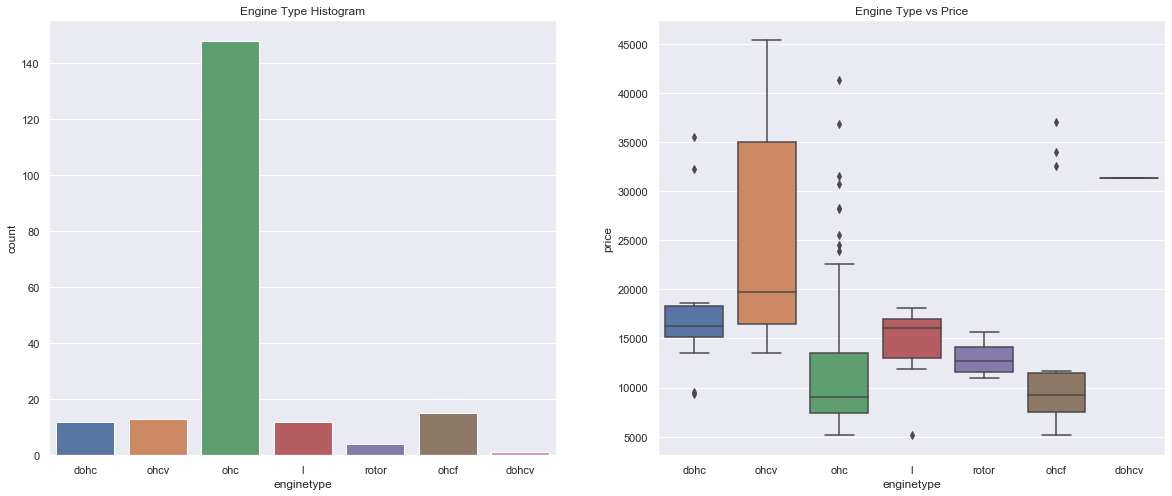

In [638]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars_raw.enginetype)

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars_raw["enginetype"], y=cars_raw["price"])

plt.show()


#### Inference :

- ohc is most sold engine type.
- ohcv engines are costly.ohc and ohcf are cheap ones.

<Figure size 1800x432 with 0 Axes>

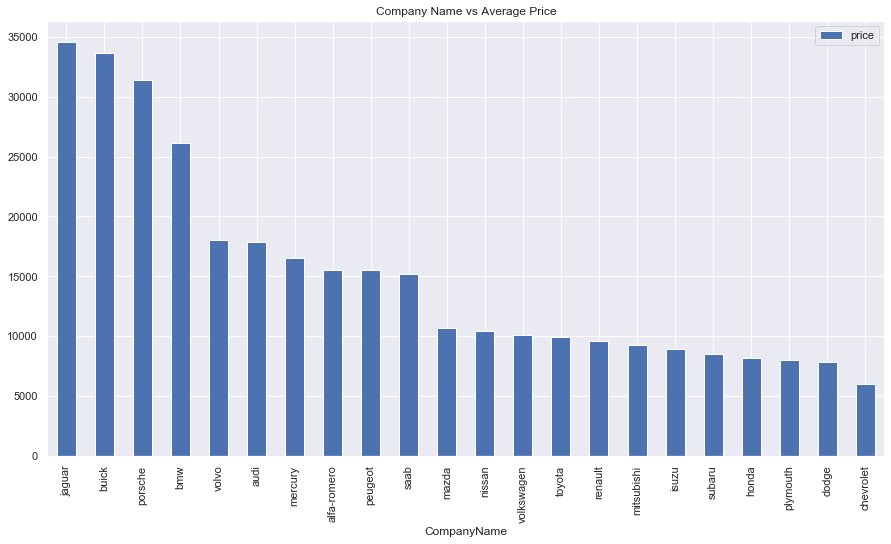

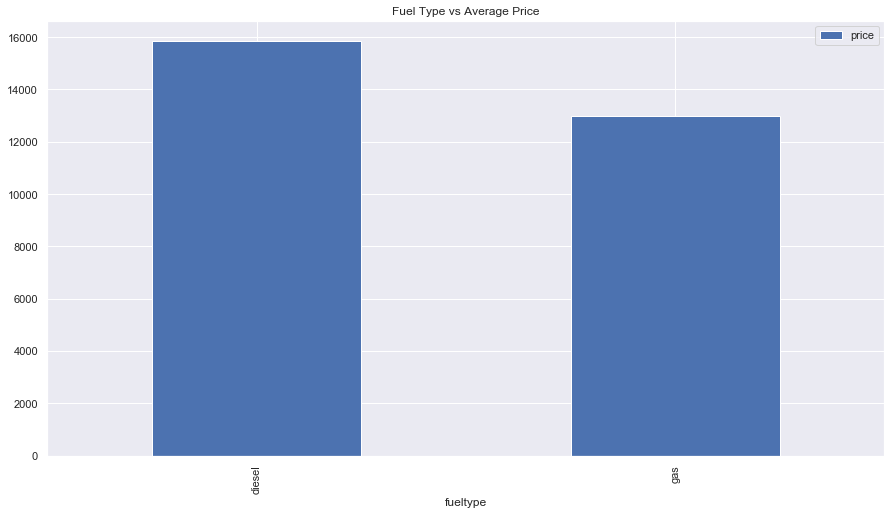

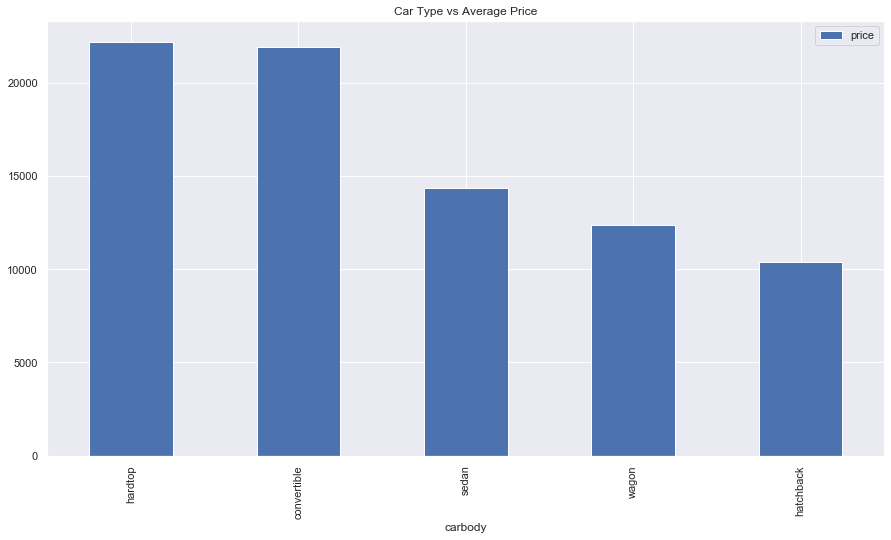

In [639]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars_raw.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars_raw.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars_raw.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

#### Inference :
- jaguar is most costly where as chevolet is least costly car.
- diesel cars are costly than pertol car when average is calculated.
- ohc is most sold engine type.
- ohcv engines are costly.ohc and ohcf are cheap ones.

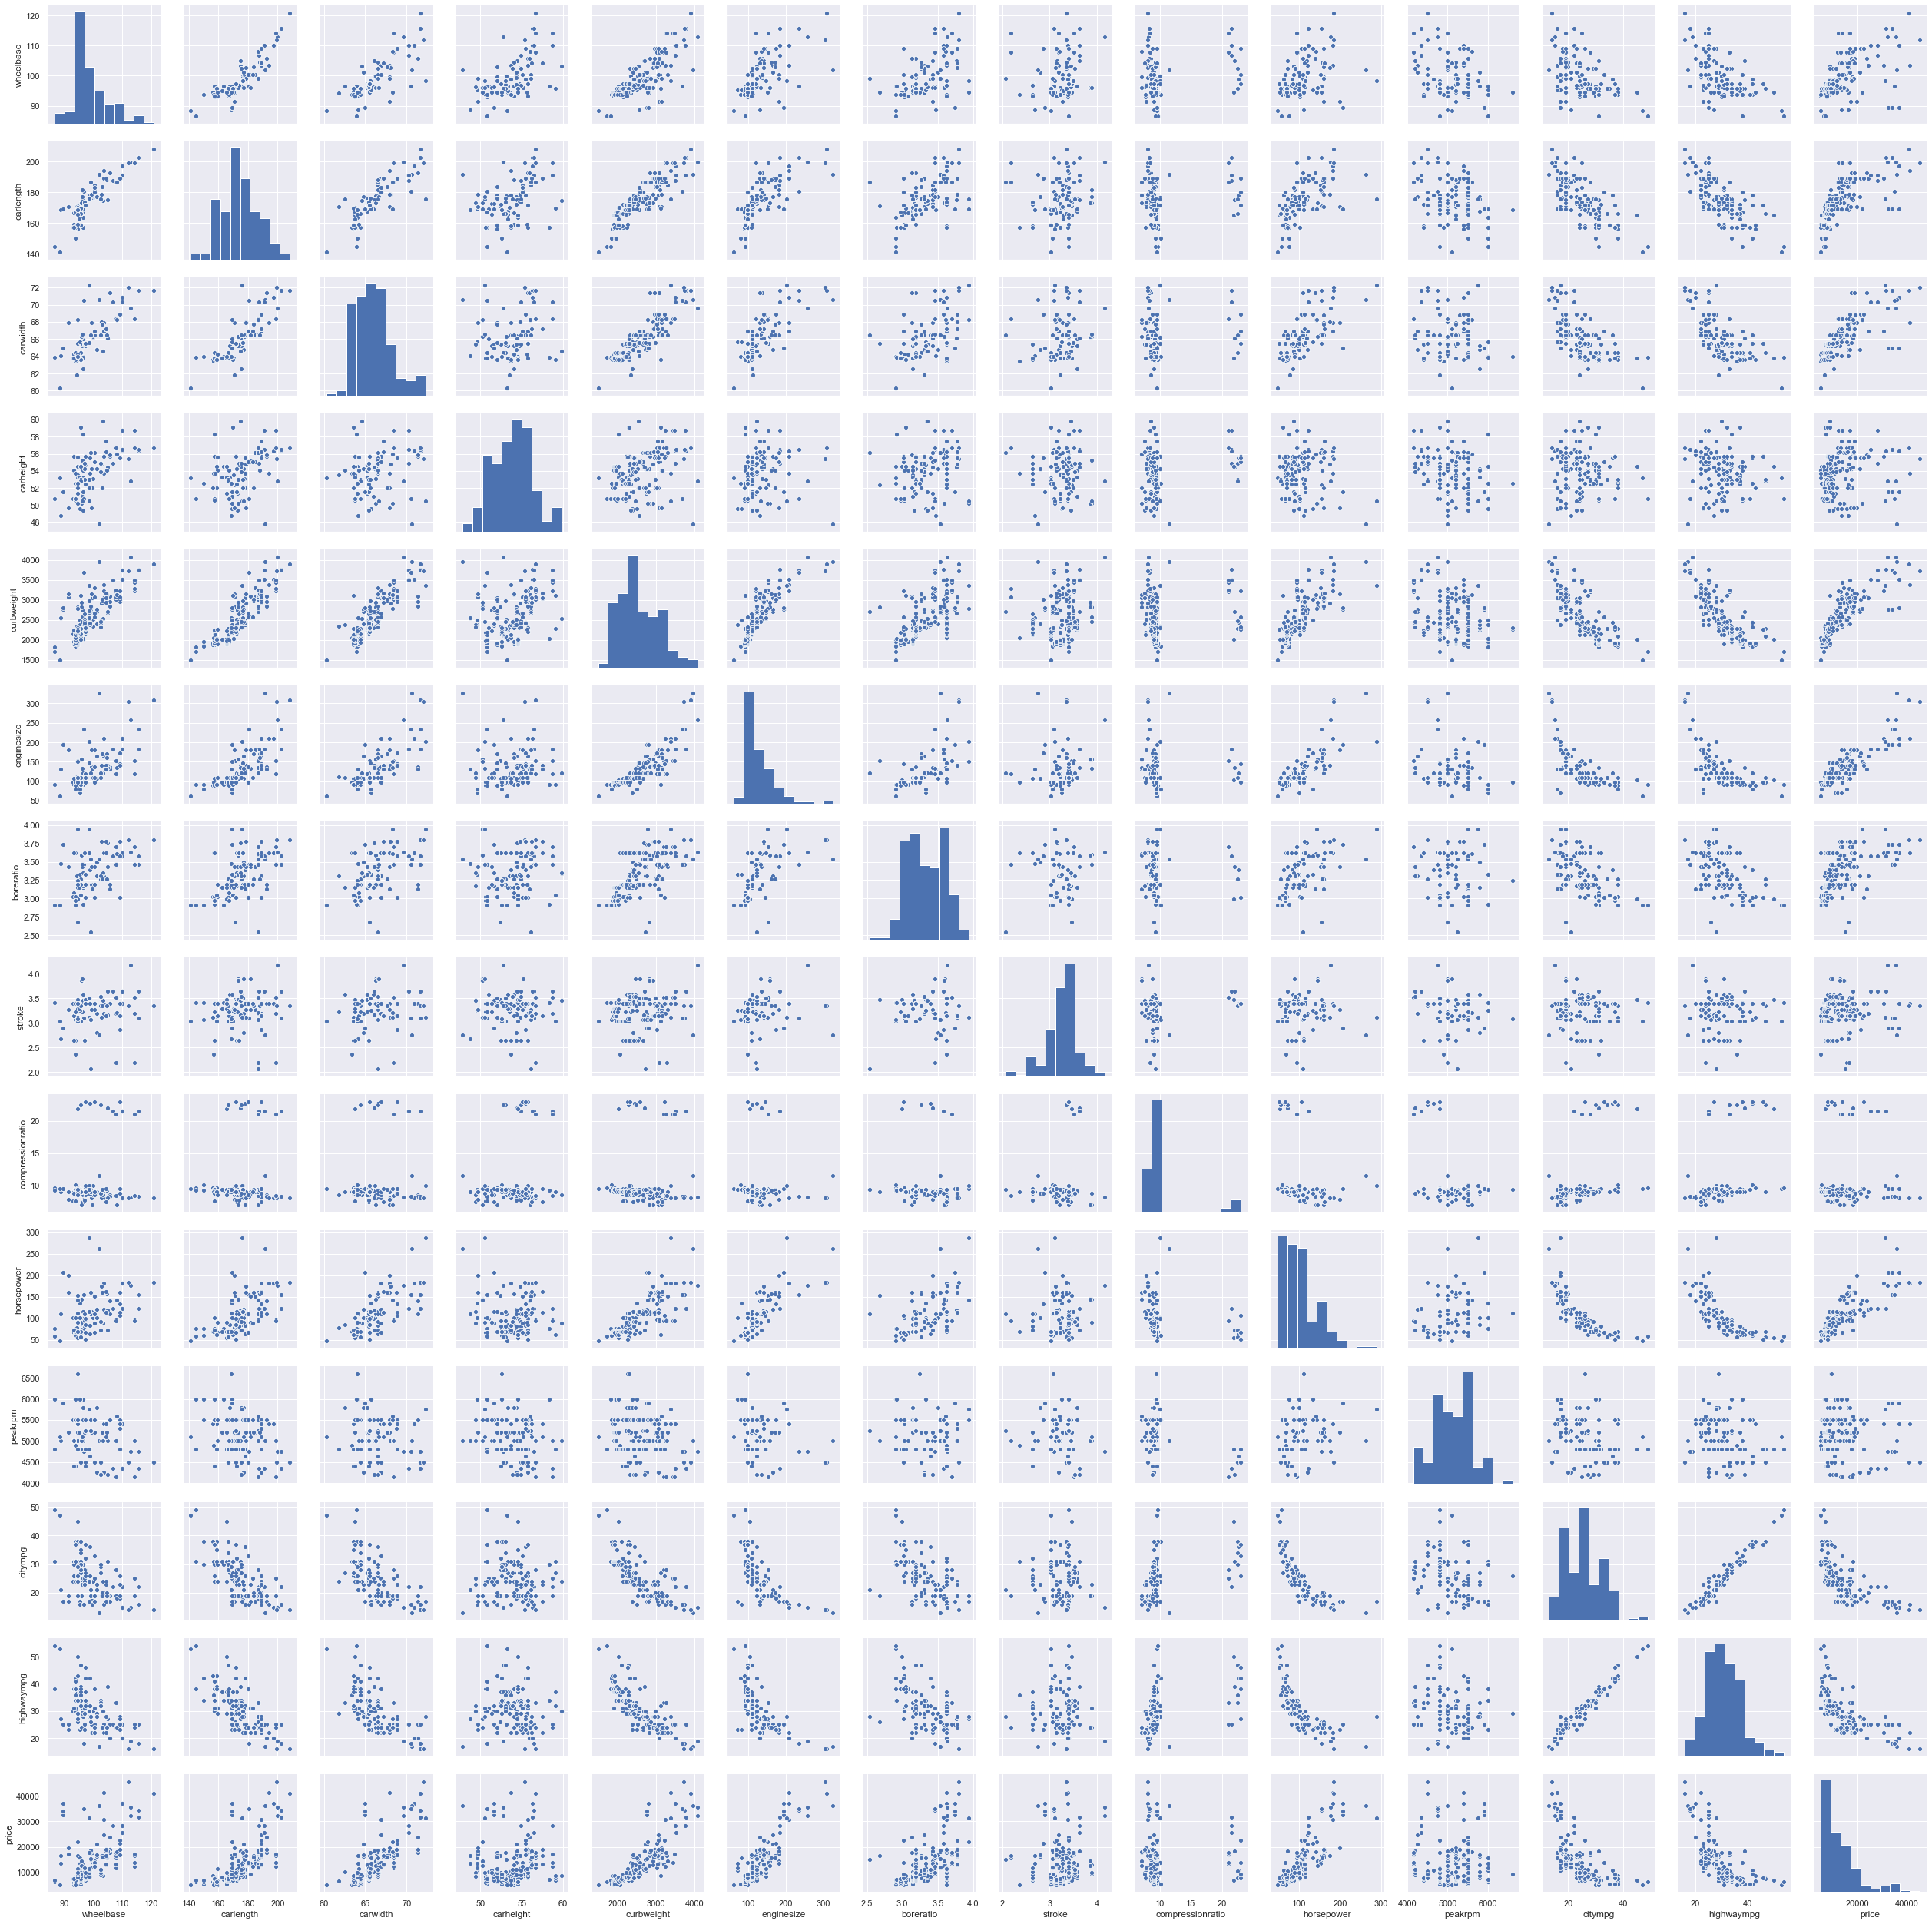

In [640]:
#Pairplot of all the numeric variables

ax = sns.pairplot(cars_raw[num_col])

#### Inference :

- Looks like wheelbase, carlength, carwidth, curbweight, enginesize has positive corelation with price.
- carheight, stroke, compression ratio, peakprm does not have any relation with price
- citympg and highwaympg has negative relation with price.

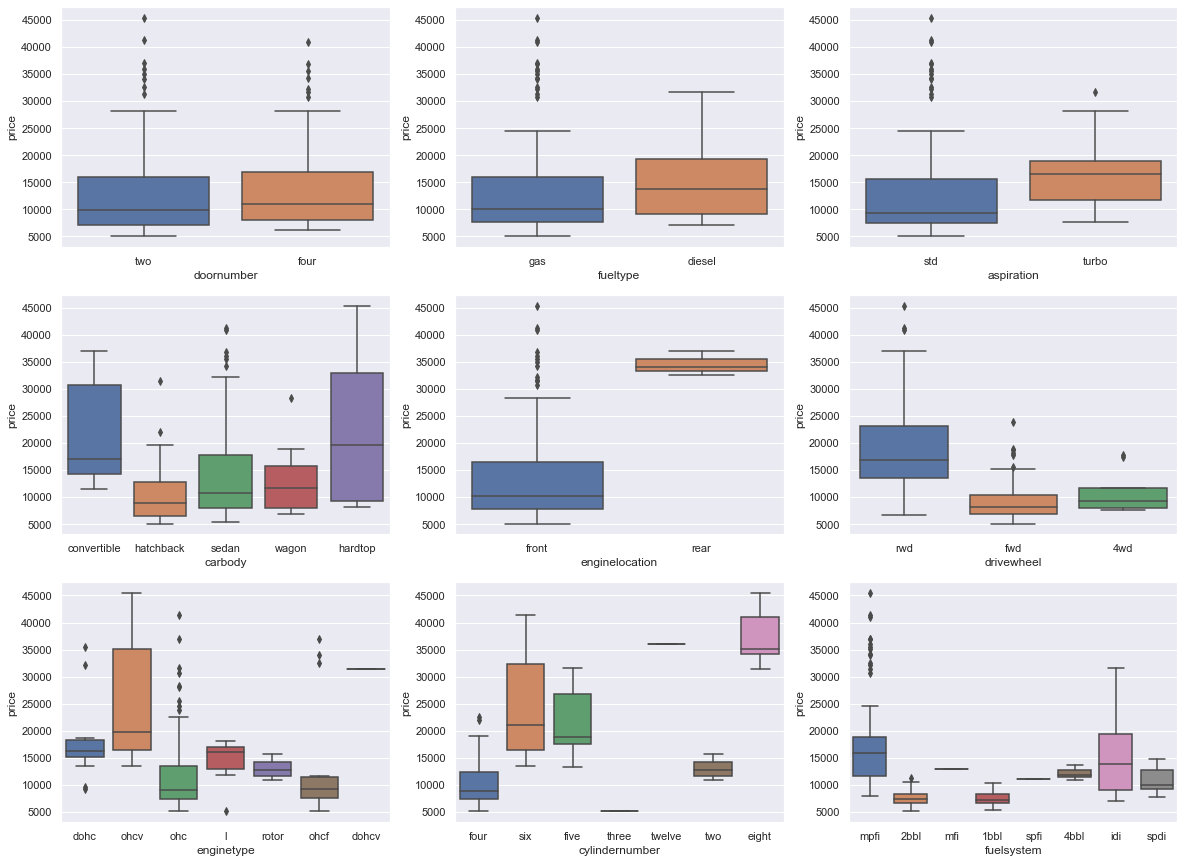

In [641]:
# Boxplot of all the categorical variables

plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'doornumber', y = 'price', data = cars_raw)
plt.subplot(3,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = cars_raw)
plt.subplot(3,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = cars_raw)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = cars_raw)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars_raw)
plt.subplot(3,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars_raw)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = cars_raw)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = cars_raw)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars_raw)
plt.show()

#### Inference :

- doornumber does not have any impact on price.
- diesel cars are costly than gas cars.
- turbo aspirations are costly.
- convertible and hardtop are costly.
- costly cars have rear engine location.
- rwd cars are costly.
- ohc engines are cheap and ochv engines are costly.
- The price of car is directly proportional to no. of cylinders in most cases (except when cylinder number is 2)
- mpfi and idi having the highest price range. 

[Text(0, 0.5, 'Count of Car Body'), Text(0.5, 0, 'Car Body')]

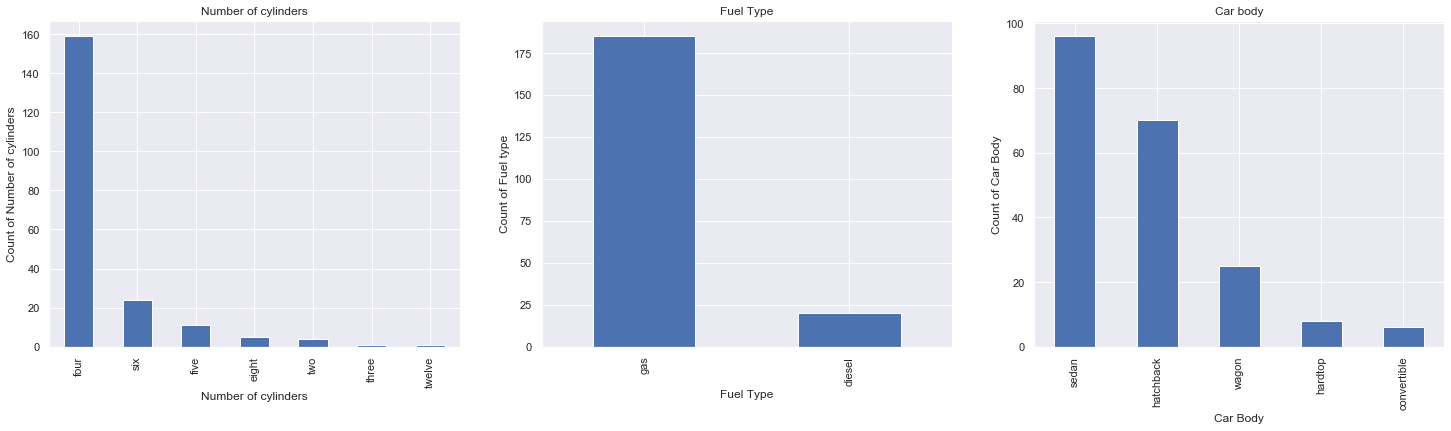

In [642]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars_raw['cylindernumber'].value_counts().plot('bar')
plt.title('Number of cylinders')
plt1.set(xlabel = 'Number of cylinders', ylabel='Count of Number of cylinders')

plt.subplot(1,3,2)
plt1 = cars_raw['fueltype'].value_counts().plot('bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Count of Fuel type')

plt.subplot(1,3,3)
plt1 = cars_raw['carbody'].value_counts().plot('bar')
plt.title('Car body')
plt1.set(xlabel = 'Car Body', ylabel='Count of Car Body')

#### Insights:
- The number of cylinders used in most cars is `four`.
- Number of `Gas` fueled cars are way more than `diesel` fueled cars.
- `Sedan` is the most prefered car type.

In [643]:
#Binning the Car Companies based on avg prices of each car Company.

cars_raw['price'] = cars_raw['price'].astype('int')
cars_raw_temp = cars_raw.copy()
t = cars_raw_temp.groupby(['CompanyName'])['price'].mean()
cars_raw_temp = cars_raw_temp.merge(t.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
label =['Budget_Friendly','Medium_Range','TopNotch_Cars']
cars_raw['Cars_Category'] = pd.cut(cars_raw_temp['price_y'],bins,right=False,labels=label)
cars_raw.head()

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Cars_Category
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,13495,Medium_Range
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,48.8000,2548,dohc,four,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,16500,Medium_Range
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,52.4000,2823,ohcv,six,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,16500,Medium_Range
3,2,audi,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,54.3000,2337,ohc,four,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,13950,Medium_Range
4,2,audi,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,54.3000,2824,ohc,five,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,17450,Medium_Range


#### Significant variables after Visualization
- Cars_Category , Engine Type, Fuel Type
- Car Body , Aspiration , Cylinder Number 
- Drivewheel , Curbweight , Car Length 
- Car Length , Car width , Engine Size
- Boreratio , Horse Power , Wheel base 
- citympg , highwaympg , symboling

In [644]:
sig_col = ['price','Cars_Category','enginetype','fueltype', 'aspiration','carbody','cylindernumber', 'drivewheel',
            'wheelbase','curbweight', 'enginesize', 'boreratio','horsepower', 
                    'citympg','highwaympg', 'carlength','carwidth']

In [645]:
cars_raw = cars_raw[sig_col]

### 4. Data Preparation

#### Dummy Variables

In [646]:
# category columns which looks important as per EDA done

cat_col = ['Cars_Category','fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber']

In [647]:
# Get dummies

dummies = pd.get_dummies(cars_raw[cat_col])
dummies.shape

(205, 29)

In [648]:
dummies = pd.get_dummies(cars_raw[cat_col], drop_first = True)
dummies.shape

(205, 22)

In [649]:
# Add dummies to the original dataframe

cars_raw = pd.concat([cars_raw, dummies], axis = 1)

In [650]:
# Drop the original cat variables as dummies are already created

cars_raw.drop(cat_col, axis = 1, inplace = True)
cars_raw.shape

(205, 32)

### 5. Creating Training and Testing Sets

In [651]:
cars_raw

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,16500,94.5000,2823,152,2.6800,154,19,26,171.2000,65.5000,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,13950,99.8000,2337,109,3.1900,102,24,30,176.6000,66.2000,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
4,17450,99.4000,2824,136,3.1900,115,18,22,176.6000,66.4000,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
5,15250,99.8000,2507,136,3.1900,110,19,25,177.3000,66.3000,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
6,17710,105.8000,2844,136,3.1900,110,19,25,192.7000,71.4000,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
7,18920,105.8000,2954,136,3.1900,110,19,25,192.7000,71.4000,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0
8,23875,105.8000,3086,131,3.1300,140,17,20,192.7000,71.4000,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
9,17859,99.5000,3053,131,3.1300,160,16,22,178.2000,67.9000,1,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [652]:
# defining seed so that the train and test data set always have the same rows
# We divide the df into 70/30 ratio for train and test dataset

np.random.seed(0)
df_train, df_test = train_test_split(cars_raw, train_size = 0.7, test_size = 0.3, random_state = 100)

In [653]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,7609,93.7000,2191,98,2.9700,68,31,38,167.3000,63.8000,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,22018,94.5000,2778,151,3.9400,143,19,27,168.9000,68.3000,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,9538,94.5000,2300,98,3.2400,112,26,29,168.7000,64.0000,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,16500,88.6000,2548,130,3.4700,111,21,27,168.8000,64.1000,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,18950,104.3000,3157,130,3.6200,162,17,22,188.8000,67.2000,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [654]:
df_train.shape

(143, 32)

In [655]:
df_test.shape

(62, 32)

### Rescaling the Features 

In linear regression model, we need to rescale the attributes so that coefficients are derived in same range. Using standardization method

In [656]:
scaler = preprocessing.StandardScaler()

In [657]:
num_col = ['wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg','price']

In [658]:
df_train[num_col] = scaler.fit_transform(df_train[num_col])

In [659]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,-0.7002,-0.8118,-0.6421,-0.6602,-1.2973,-0.8729,0.8398,1.0254,-0.4872,-0.9245,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,1.1519,-0.6772,0.4394,0.6378,2.4323,1.0218,-0.9570,-0.5575,-0.3598,1.1150,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,-0.4522,-0.6772,-0.4413,-0.6602,-0.2592,0.2387,0.0911,-0.2697,-0.3757,-0.8339,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0.4426,-1.6703,0.0156,0.1235,0.6251,0.2134,-0.6576,-0.5575,-0.3678,-0.7885,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,0.7576,0.9724,1.1377,0.1235,1.2019,1.5018,-1.2565,-1.2770,1.2254,0.6164,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


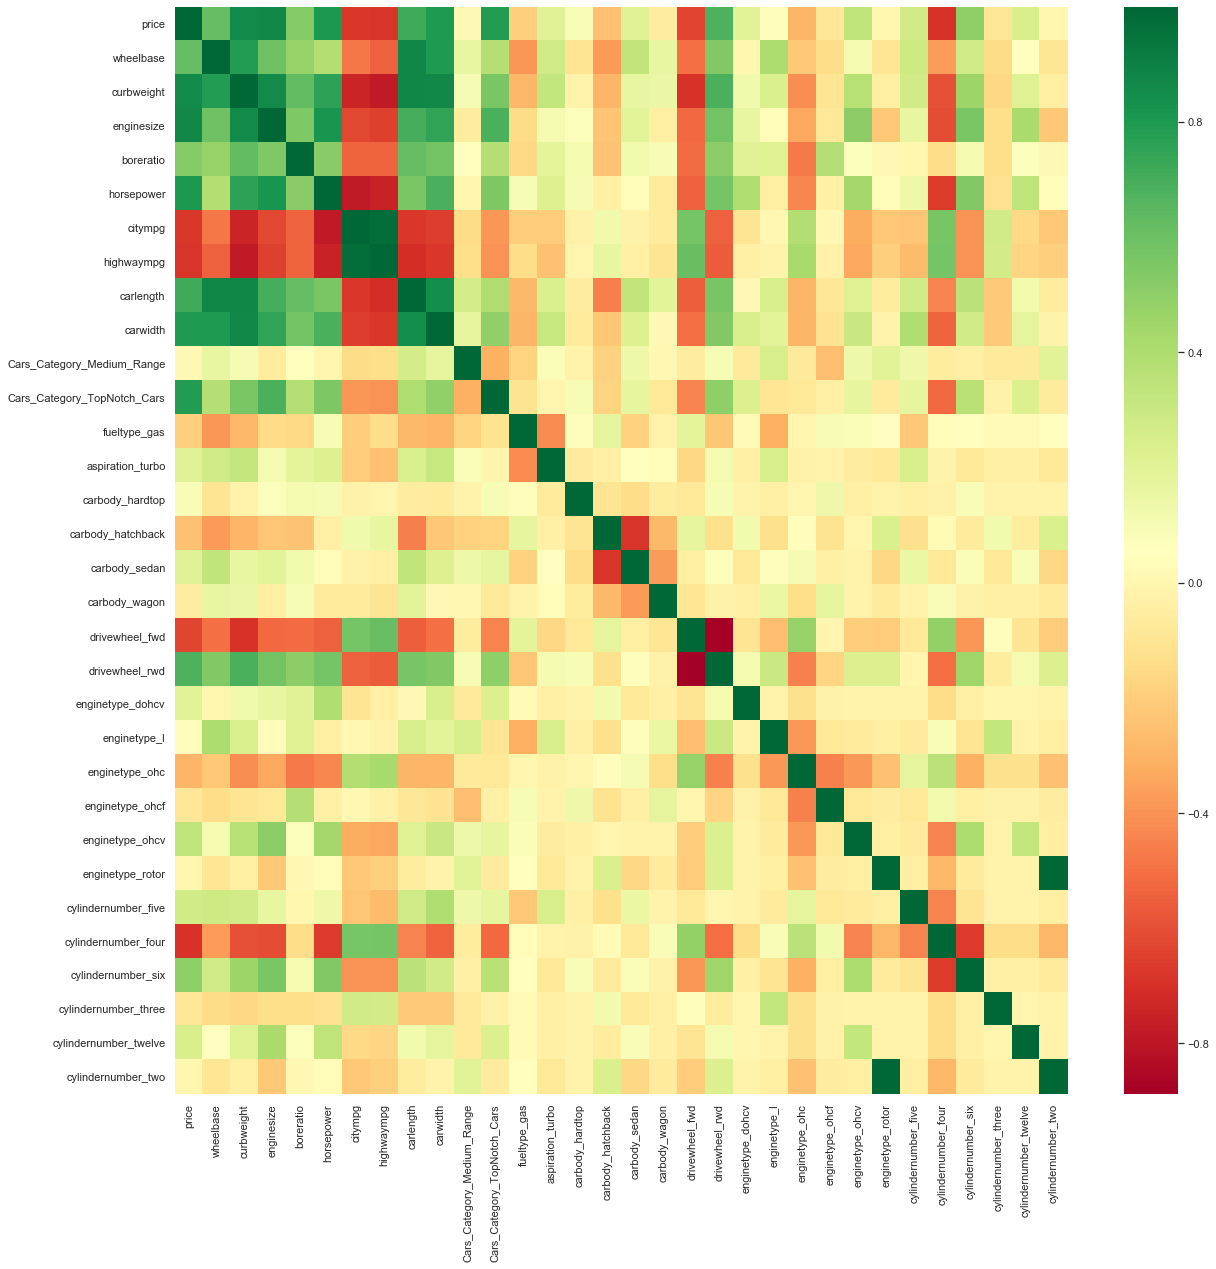

In [660]:
# checking correlation coefficients to understand which all variables are highly co-related

# we can see that wheelbase, curbweight, enginesize, horsepower, highwaympg,citympg, carwidth 
# have high co-relation with price

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn")
plt.show()

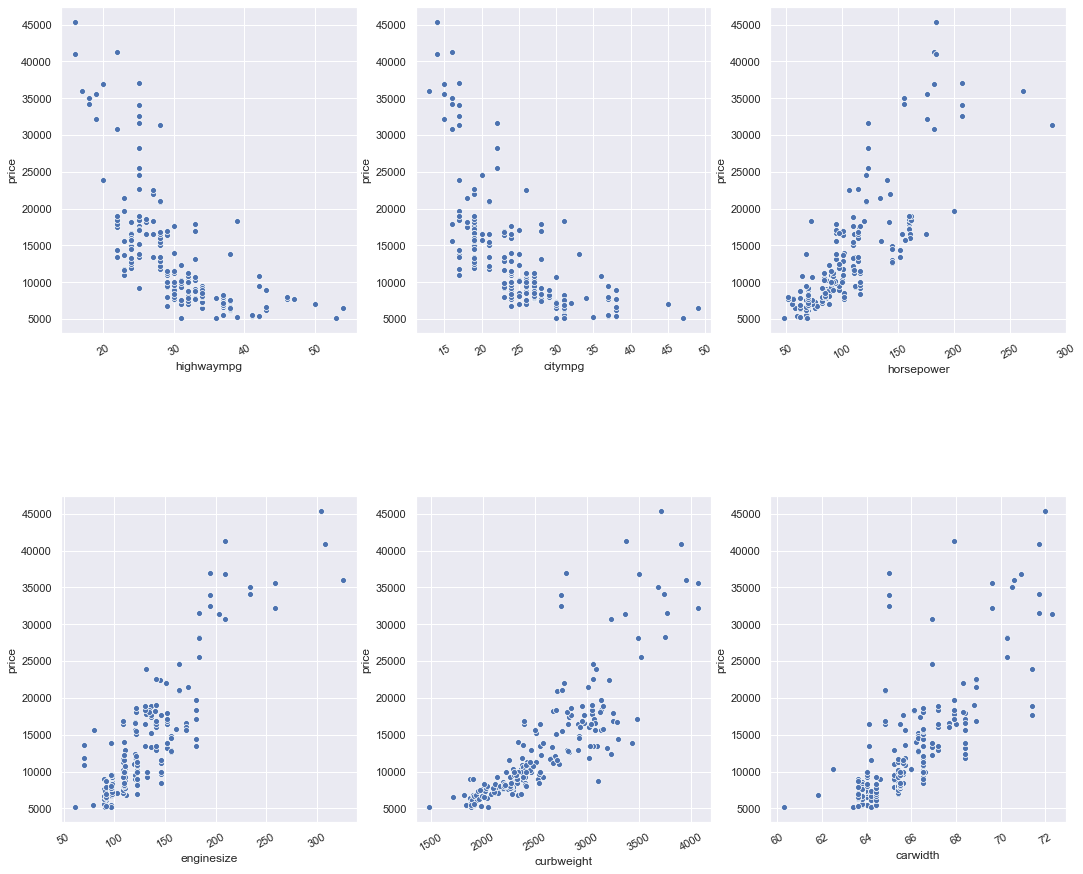

In [661]:
# scatterplot for few correlated variables vs price

col = ['highwaympg','citympg','horsepower','enginesize','curbweight','carwidth']

fig,axes = plt.subplots(2,3,figsize=(18,15))
for seg,col in enumerate(col):
    x,y = seg//3,seg%3
    plot1=sns.scatterplot(x=col, y='price' ,data=cars_raw, ax=axes[x,y])
    plt.setp(plot1.get_xticklabels(), rotation=30)
   
plt.subplots_adjust(hspace=0.5)

In [662]:
# As we can see above all variables are on a line i.e we can draw a line through it.

### Dividing into X and Y sets for the model building

In [663]:
y_train = df_train.pop('price')
X_train = df_train

### Model 1 - Add variable

In [664]:
X_train_1 = X_train['horsepower']

In [683]:
# Add a constant
X_train_constant1 = sm.add_constant(X_train_1)

# Create fitted model
linear_Regression_model_1 = sm.OLS(y_train, X_train_constant1).fit()

In [685]:
linear_Regression_model_1.params

const        0.0000
horsepower   0.8062
dtype: float64

In [686]:
# Print a summary of the linear regression model obtained
print(linear_Regression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     261.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.05e-34
Time:                        01:23:07   Log-Likelihood:                -127.86
No. Observations:                 143   AIC:                             259.7
Df Residuals:                     141   BIC:                             265.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.674e-17      0.050   1.74e-15      1.0

### Model 2 - Add variable
##### Adding a new variable curbweight to improve R-Squared from .65

In [668]:
X_train_2 = X_train[['horsepower', 'curbweight']]

In [687]:
# Add a constant
X_train_constant2 = sm.add_constant(X_train_2)

# Create fitted model
linear_Regression_model_2 = sm.OLS(y_train, X_train_constant2).fit()

In [688]:
linear_Regression_model_2.params

const        0.0000
horsepower   0.3581
curbweight   0.5898
dtype: float64

In [689]:
print(linear_Regression_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     274.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.34e-49
Time:                        01:23:57   Log-Likelihood:                -88.896
No. Observations:                 143   AIC:                             183.8
Df Residuals:                     140   BIC:                             192.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.674e-17      0.038   2.28e-15      1.0

### Model 3 - Add variable
##### Adding a new variable enginesize to improve R-Squared from .79

In [672]:
X_train_3 = X_train[['horsepower', 'curbweight', 'enginesize']]

In [690]:
# Add a constant
X_train_constant3 = sm.add_constant(X_train_3)

# Create fitted model
linear_Regression_model_3 = sm.OLS(y_train, X_train_constant3).fit()

In [691]:
linear_Regression_model_3.params

const        0.0000
horsepower   0.2288
curbweight   0.3938
enginesize   0.3400
dtype: float64

In [693]:
print(linear_Regression_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     209.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.16e-51
Time:                        01:26:35   Log-Likelihood:                -80.681
No. Observations:                 143   AIC:                             169.4
Df Residuals:                     139   BIC:                             181.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.021e-17      0.036    2.5e-15      1.0

### Model 4 - Add variable
##### Adding a new variable enginesize to improve R-Squared from .819

In [694]:
X_train_4 = X_train[['horsepower', 'curbweight', 'enginesize', 'carwidth']]

In [695]:
# Add a constant
X_train_constant4 = sm.add_constant(X_train_4)

# Create fitted model
linear_Regression_model_4 = sm.OLS(y_train, X_train_constant4).fit()

In [697]:
linear_Regression_model_4.params

const        0.0000
horsepower   0.2167
curbweight   0.2403
enginesize   0.3485
carwidth     0.1778
dtype: float64

In [698]:
print(linear_Regression_model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     164.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.91e-51
Time:                        01:29:07   Log-Likelihood:                -77.687
No. Observations:                 143   AIC:                             165.4
Df Residuals:                     138   BIC:                             180.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.021e-17      0.035   2.54e-15      1.0

#### we have achived R-squared as .826 by manually adding 4 variables. 
#### Now we will use RFE method and see how much R-squared we can achieve.

## RFE (Recursive feature elimination )

In [676]:
X_train.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,carlength,carwidth,Cars_Category_Medium_Range,Cars_Category_TopNotch_Cars,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
122,-0.8118,-0.6421,-0.6602,-1.2973,-0.8729,0.8398,1.0254,-0.4872,-0.9245,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
125,-0.6772,0.4394,0.6378,2.4323,1.0218,-0.9570,-0.5575,-0.3598,1.1150,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
166,-0.6772,-0.4413,-0.6602,-0.2592,0.2387,0.0911,-0.2697,-0.3757,-0.8339,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,-1.6703,0.0156,0.1235,0.6251,0.2134,-0.6576,-0.5575,-0.3678,-0.7885,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
199,0.9724,1.1377,0.1235,1.2019,1.5018,-1.2565,-1.2770,1.2254,0.6164,1,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0


In [677]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [678]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 5),
 ('curbweight', True, 1),
 ('enginesize', False, 11),
 ('boreratio', False, 8),
 ('horsepower', True, 1),
 ('citympg', False, 17),
 ('highwaympg', False, 4),
 ('carlength', False, 12),
 ('carwidth', True, 1),
 ('Cars_Category_Medium_Range', False, 3),
 ('Cars_Category_TopNotch_Cars', True, 1),
 ('fueltype_gas', False, 9),
 ('aspiration_turbo', False, 13),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 6),
 ('drivewheel_rwd', False, 10),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 15),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 2),
 ('enginetype_ohcv', True, 1),
 ('enginetype_rotor', False, 16),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', True, 1),
 ('cylindernumber_three', False, 7),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 14)]

In [701]:
rfe_support_cols = X_train.columns[rfe.support_]
rfe_support_cols

Index(['curbweight', 'horsepower', 'carwidth', 'Cars_Category_TopNotch_Cars',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'enginetype_ohc',
       'enginetype_ohcv', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_twelve'],
      dtype='object')

In [702]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[rfe_support_cols]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value and accordingly drop columns.

## Model 1 - RFE

In [705]:
# Adding a constant variable and Build fitted model
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
linear_model_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(linear_model_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     124.2
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           3.41e-68
Time:                        01:48:03   Log-Likelihood:                -6.1473
No. Observations:                 143   AIC:                             44.29
Df Residuals:                     127   BIC:                             91.70
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

### Checking VIF and determining if column is highly corelated with other columns and should be dropped

In [682]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,15.9200
6,carbody_sedan,9.7300
0,curbweight,9.0600
2,carwidth,6.2400
5,carbody_hatchback,6.1500
9,enginetype_ohc,5.9700
1,horsepower,5.6100
13,cylindernumber_six,4.7300
7,carbody_wagon,3.4800
11,cylindernumber_five,2.8200


## Model 2 - RFE

In [706]:
# Dropping highly correlated variables and insignificant variables - cylindernumber_twelve - p-value .393 > 0.05

X_train_rfe1 = X_train_rfe.drop('cylindernumber_twelve', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
linear_model_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(linear_model_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     133.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.16e-69
Time:                        01:48:30   Log-Likelihood:                -6.5600
No. Observations:                 143   AIC:                             43.12
Df Residuals:                     128   BIC:                             87.56
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [707]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,15.2700
0,curbweight,9.0600
6,carbody_sedan,9.0500
2,carwidth,6.1500
5,carbody_hatchback,5.9500
9,enginetype_ohc,5.9200
1,horsepower,4.6900
13,cylindernumber_six,3.7000
7,carbody_wagon,3.3100
11,cylindernumber_five,2.6600


## Model 3 - RFE

In [708]:
# Dropping highly correlated variables(3.7) and insignificant variables - cylindernumber_six- p-value .49>.05

X_train_rfe2 = X_train_rfe1.drop('cylindernumber_six', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
linear_model_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(linear_model_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     144.1
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.29e-70
Time:                        01:55:15   Log-Likelihood:                -6.8230
No. Observations:                 143   AIC:                             41.65
Df Residuals:                     129   BIC:                             83.13
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [709]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,cylindernumber_four,8.9900
0,curbweight,8.5300
2,carwidth,5.7200
9,enginetype_ohc,5.6500
6,carbody_sedan,5.2400
1,horsepower,4.5300
5,carbody_hatchback,3.7600
7,carbody_wagon,2.3600
3,Cars_Category_TopNotch_Cars,2.1300
11,cylindernumber_five,1.9700


## Model 4 - RFE

In [710]:
# Dropping highly correlated variables and insignificant variables - carbody_hardtop - p-value is .238 > .05

X_train_rfe3 = X_train_rfe2.drop('carbody_hardtop', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe3c = sm.add_constant(X_train_rfe3)
linear_model_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(linear_model_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     155.5
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           6.73e-71
Time:                        02:00:01   Log-Likelihood:                -7.5979
No. Observations:                 143   AIC:                             41.20
Df Residuals:                     130   BIC:                             79.71
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [711]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.5100
11,cylindernumber_four,8.0900
2,carwidth,5.6500
8,enginetype_ohc,5.6000
5,carbody_sedan,4.6400
1,horsepower,4.1700
4,carbody_hatchback,3.3100
6,carbody_wagon,2.2200
3,Cars_Category_TopNotch_Cars,2.0800
10,cylindernumber_five,1.9300


## Model 5 - RFE

In [712]:
# Dropping highly correlated variables and insignificant variables - enginetype_ohc - p-value is .110 > .05

X_train_rfe4 = X_train_rfe3.drop('enginetype_ohc', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe4c = sm.add_constant(X_train_rfe4)
linear_model_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(linear_model_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     167.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.81e-71
Time:                        02:08:20   Log-Likelihood:                -9.0049
No. Observations:                 143   AIC:                             42.01
Df Residuals:                     131   BIC:                             77.56
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [713]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.2500
10,cylindernumber_four,6.8000
2,carwidth,5.6500
5,carbody_sedan,4.3300
1,horsepower,4.1700
4,carbody_hatchback,3.1000
6,carbody_wagon,2.2000
3,Cars_Category_TopNotch_Cars,1.8300
9,cylindernumber_five,1.6300
7,enginetype_dohcv,1.5700


## Model 6 - RFE

In [717]:
# Dropping highly correlated variables and insignificant variables - cylindernumber_five - p-value is .104 > .05

X_train_rfe5 = X_train_rfe4.drop('cylindernumber_five', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe5c = sm.add_constant(X_train_rfe5)
linear_model_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(linear_model_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     181.6
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.91e-72
Time:                        02:23:01   Log-Likelihood:                -10.457
No. Observations:                 143   AIC:                             42.91
Df Residuals:                     132   BIC:                             75.51
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [718]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.1000
9,cylindernumber_four,5.7600
2,carwidth,5.0800
1,horsepower,4.1300
5,carbody_sedan,3.5200
4,carbody_hatchback,2.6300
6,carbody_wagon,1.9400
3,Cars_Category_TopNotch_Cars,1.8300
7,enginetype_dohcv,1.5400
8,enginetype_ohcv,1.4300


## Model 7 - RFE

In [719]:
# Dropping highly correlated variables and insignificant variables - enginetype_ohcv - p-value is .180 > .05

X_train_rfe6 = X_train_rfe5.drop('enginetype_ohcv', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe6c = sm.add_constant(X_train_rfe6)
linear_model_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(linear_model_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     200.3
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           8.26e-73
Time:                        02:25:04   Log-Likelihood:                -11.434
No. Observations:                 143   AIC:                             42.87
Df Residuals:                     133   BIC:                             72.50
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [720]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,8.1000
8,cylindernumber_four,5.6600
2,carwidth,5.0800
1,horsepower,3.8100
5,carbody_sedan,3.3500
4,carbody_hatchback,2.4700
6,carbody_wagon,1.8900
3,Cars_Category_TopNotch_Cars,1.8100
7,enginetype_dohcv,1.4900


## Model 8 - RFE

In [721]:
# Dropping highly correlated variables and insignificant variables
# All P value is < 0.5 hence dropping columns with VIF > 5 - Dropping column curbweight

X_train_rfe7 = X_train_rfe6.drop('curbweight', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe7c = sm.add_constant(X_train_rfe7)
linear_model_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(linear_model_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     203.4
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.86e-71
Time:                        02:29:17   Log-Likelihood:                -18.737
No. Observations:                 143   AIC:                             55.47
Df Residuals:                     134   BIC:                             82.14
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [722]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,cylindernumber_four,5.6600
4,carbody_sedan,3.3500
0,horsepower,2.7200
3,carbody_hatchback,2.4000
1,carwidth,2.2200
2,Cars_Category_TopNotch_Cars,1.7300
5,carbody_wagon,1.7100
6,enginetype_dohcv,1.2400


## Model 9 - RFE

In [724]:
# Dropping highly correlated variables and insignificant variables
# All P value is < 0.5 hence dropping columns with VIF > 5 - Dropping column cylindernumber_four

X_train_rfe8 = X_train_rfe7.drop('cylindernumber_four', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe8c = sm.add_constant(X_train_rfe8)
linear_model_rfe8 = sm.OLS(y_train, X_train_rfe8c).fit()

#Summary of linear model
print(linear_model_rfe8.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     215.9
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           4.70e-70
Time:                        02:32:21   Log-Likelihood:                -24.089
No. Observations:                 143   AIC:                             64.18
Df Residuals:                     135   BIC:                             87.88
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [725]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.4500
1,carwidth,2.1200
2,Cars_Category_TopNotch_Cars,1.7000
4,carbody_sedan,1.2200
6,enginetype_dohcv,1.2200
3,carbody_hatchback,1.1000
5,carbody_wagon,1.0200


## Model 10 - RFE

In [726]:
# Dropping variable carbody_wagon to check if it much impacts R-Squared or not. Actually it impacts only .005
# hence dropping this variable is correct

X_train_rfe9 = X_train_rfe8.drop('carbody_wagon', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe9c = sm.add_constant(X_train_rfe9)
linear_model_rfe9 = sm.OLS(y_train, X_train_rfe9c).fit()

#Summary of linear model
print(linear_model_rfe9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     236.7
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           2.09e-69
Time:                        02:40:30   Log-Likelihood:                -28.626
No. Observations:                 143   AIC:                             71.25
Df Residuals:                     136   BIC:                             91.99
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [727]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe9.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe9.values, i) for i in range(X_train_rfe9.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.4100
1,carwidth,2.1100
2,Cars_Category_TopNotch_Cars,1.6900
4,carbody_sedan,1.2200
5,enginetype_dohcv,1.2200
3,carbody_hatchback,1.1000


## Model 11 - RFE

In [728]:
# Dropping variable carbody_sedan as p-value is .447 > .05

X_train_rfe10 = X_train_rfe9.drop('carbody_sedan', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe10c = sm.add_constant(X_train_rfe10)
linear_model_rfe10 = sm.OLS(y_train, X_train_rfe10c).fit()

#Summary of linear model
print(linear_model_rfe10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 20 Jan 2020   Prob (F-statistic):           1.57e-70
Time:                        02:44:22   Log-Likelihood:                -28.930
No. Observations:                 143   AIC:                             69.86
Df Residuals:                     137   BIC:                             87.64
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [729]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe10.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe10.values, i) for i in range(X_train_rfe10.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.2800
1,carwidth,2.0700
2,Cars_Category_TopNotch_Cars,1.4500
4,enginetype_dohcv,1.2200
3,carbody_hatchback,1.1000


### This model 11 is final now because all P-values are less than .05 and all VIF are less than 5

## Residual analysis of model 11

Text(0.5, 0, 'Errors in predictions')

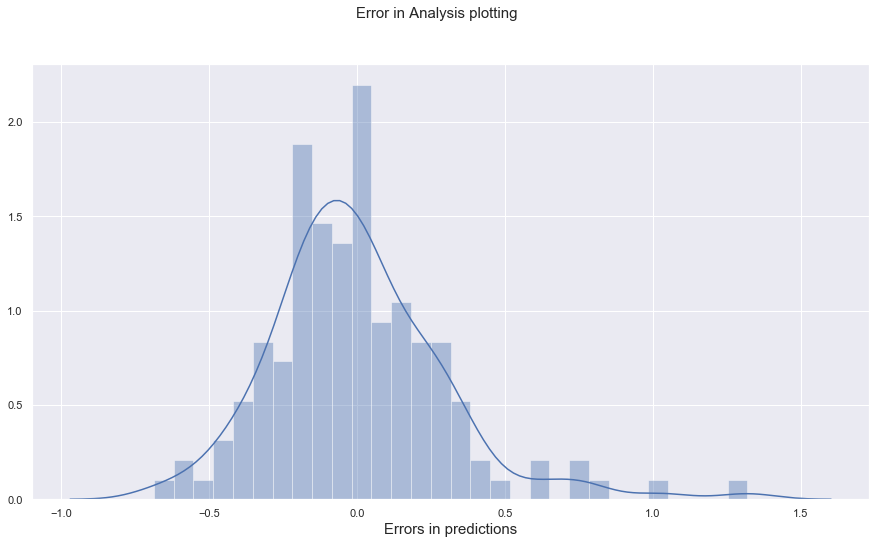

In [733]:
# Predicting the price of training set.
y_train_predicted_price = linear_model_rfe10.predict(X_train_rfe10c)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predicted_price), bins = 30)
fig.suptitle('Error in Analysis plotting', fontsize = 15)                   
plt.xlabel('Errors in predictions', fontsize = 15)

# Normality of error terms look ok

## Final prediction of values using model

In [734]:
import warnings
warnings.filterwarnings("ignore")

df_test[sig_num_col] = scaler.transform(df_test[sig_num_col])
df_test.shape

(62, 32)

In [735]:
# Creating X_test and y_test

y_test = df_test.pop('price')
X_test = df_test

In [736]:
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe10c.columns]

In [738]:
y_pred = linear_model_rfe10.predict(X_test_new)

## Model Evaluation - to calculate the R-squared score on the test set

In [739]:
r2_score(y_test, y_pred)

0.9094354289897943

The R2 score of Training set is 0.912 and Test set is 0.909 which shows that model is predicting values closely. 

Our model is good enough to predict the Car prices using below predictor variables
- horsepower
- carwidth 
- Cars_Category_TopNotch_Cars
- carbody_hatchback
- enginetype_dohcv
